# Comparing paired data

## Introduction

In hypothesis testing, the **paired t-test** is an indispensable tool when we need to ascertain if there's a genuine difference within the same group or individuals, but at two distinct points in time or under two different conditions. This scenario is commonplace in a variety of research contexts, such as evaluating the effectiveness of a training program by comparing participants' performance before and after the program, or assessing the impact of a new diet on patients' cholesterol levels by examining their readings before and after adopting the diet. The paired t-test empowers us to glean statistically robust insights from such data, facilitating informed decision-making.

The hallmark of the paired t-test is its focus on **paired or matched data**. Here, each observation in one group has a corresponding observation in the other group. This pairing could stem from repeated measurements on the same subjects (e.g., before-and-after measurements), or it could involve matching subjects based on relevant characteristics (e.g., age, gender) to minimize confounding factors. The test zeroes in on the *differences* between these paired observations, gauging whether the average difference is statistically significant or merely attributable to chance.

Before embarking on a paired t-test analysis, it's imperative to ensure our data aligns with certain assumptions:

* **Normality**: the *differences* between the paired observations should ideally conform to a normal distribution. However, like its unpaired counterpart, the paired t-test exhibits reasonable resilience to moderate departures from normality, particularly when dealing with larger sample sizes.
* **Independence**: the *differences* between the paired observations should be independent of each other.

At its core, the paired t-test operates by computing a test statistic ([discussed in detail in the chapter on the unpaired t-test](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html)) that encapsulates the *average difference* between the paired observations relative to the variability of these differences. This test statistic adheres to a well-defined distribution ([the **t-distribution**, also covered previously](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-distribution)) under the null hypothesis of no difference. By juxtaposing the calculated test statistic with the anticipated distribution, we derive a P value. Should the P value dip below our predetermined significance level (alpha), we reject the null hypothesis and infer the presence of a statistically significant difference.

In the forthcoming sections, we'll embark on a deeper exploration of the mathematical underpinnings of the paired t-test, explore its practical applications through illustrative examples, and equip ourselves with the knowledge and confidence to wield this test effectively in your own analytical endeavors.

## Preparing data for hypothesis testing

### Descriptive statistics

In this section, we will introduce the importance of descriptive statistics and visualization in understanding the characteristics of the paired data being compared. We will emphasize how these techniques provide valuable insights into the central tendency, spread, and distribution of the differences between the paired observations, which are crucial for interpreting the results of the paired t-test.

[Fisher analyzed an experiment](https://en.wikipedia.org/wiki/The_Design_of_Experiments) conducted by Charles Darwin, where the [growth of plants](https://en.wikipedia.org/wiki/The_Effects_of_Cross_and_self_fertililisation_in_the_Vegetable_Kingdom) originating from *self-fertilized* seeds was compared to those from *cross-fertilized* seeds. To ensure fairness, Darwin planted these seeds in pairs, side-by-side, effectively controlling for any environmental factors (like soil quality, temperature, or sunlight) that might influence both types of seeds. The data below showcases one such matched set.

In [39]:
# We use the data from Table 31.1 (page 307) of the book Intuitive Biostatistics 4th Edition
import numpy as np
import pandas as pd

# Import the raw data as Series; unit is inches
crossed_fertil = pd.Series(
    [23.5, 12, 21, 22, 19.125, 21.5, 22.125, 20.375, 18.250, 21.625, 23.250, 21, 22.125, 23, 12])
self_fertil = pd.Series(
    [17.375, 20.375, 20, 20, 18.375, 18.625, 18.625, 15.25, 16.5, 18, 16.25, 18, 12.75, 15.5, 18])
# note that each row represents a paired observation

# Concatenate the data in a DataFrame for some operations
data_fert = pd.concat(
    [crossed_fertil, self_fertil],
    keys=['crossed_fertil', 'self_fertil'],
    axis=1)

Performing descriptive statistics and visualization is just as crucial in the context of a paired t-test as it is in unpaired tests. However, we need to adapt our approach to focus on the **differences** between the paired observations, as these differences form the core of the paired t-test analysis.

Utilizing a dictionary or a DataFrame enhances the clarity of the data structure and simplifies subsequent analysis and visualization.

In [40]:
# Calculate the difference between cross-fertilization and self-fertilization for each pair
#differences_fert = data_fert['crossed_fertil'] - data_fert['self_fertil']
differences_fert = crossed_fertil - self_fertil

# Print or display the calculated differences
print(differences_fert) 

0     6.125
1    -8.375
2     1.000
3     2.000
4     0.750
5     2.875
6     3.500
7     5.125
8     1.750
9     3.625
10    7.000
11    3.000
12    9.375
13    7.500
14   -6.000
dtype: float64


In [41]:
import scipy.stats as stats

# Descriptive statistics of the differences
differences_fert_stats = stats.describe(differences_fert)

print("Descriptive statistics for the differences:\n", differences_fert_stats)

Descriptive statistics for the differences:
 DescribeResult(nobs=15, minmax=(-8.375, 9.375), mean=2.6166666666666667, variance=22.259970238095235, skewness=-0.9920929151820244, kurtosis=0.6057395436698894)


### Data visualization

In paired data analysis, visualizing the differences between the paired values is crucial for gaining insights into the data and assessing the assumptions of the paired t-test. These visualizations help us understand the magnitude and direction of the changes, identify potential outliers, and check if the differences follow a roughly normal distribution. Common visualization techniques for paired data differences include:

- Boxplots: provide a compact summary of the distribution of the differences, including median, quartiles, and potential outliers.
- Before-after plots: show how each individual pair's values change, highlighting overall trends and individual variations.

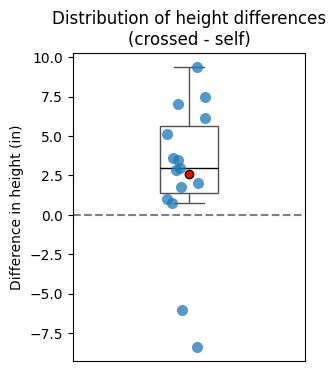

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,4))

# Create the stripplot
sns.stripplot(
    y=differences_fert,
    size=8,
    alpha=0.75)

# Add a boxplot on the right side
sns.boxplot(
    y=differences_fert,
    width=0.25,
    showmeans=True,  # Show mean as a point inside the boxplot
    fliersize=0,  # Hide outliers from boxplot to avoid visual clutter
    # Custumize a few elements of the plot
    boxprops={'facecolor': 'none'},  # Make the boxplot transparent
    medianprops={'color': 'black'},
    meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'},
)

# Add a horizontal line at y=0 (no difference)
plt.axhline(
    y=0,
    color='gray',
    linestyle='--',
    linewidth=1.5)

# Set plot labels and title
plt.ylabel('Difference in height (in)')
plt.xticks([])
plt.title('Distribution of height differences\n(crossed - self)');

c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\pingouin\plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["wthn"] = data[within].replace({_ordr: i for i, _ordr in enumerate(order)})


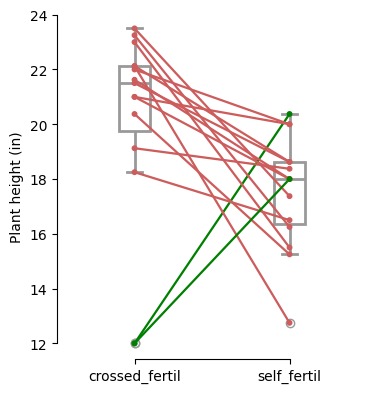

In [43]:
import pingouin as pg

plt.figure(figsize=(4, 4.5))

pg.plot_paired(
    # We need to reshape the DataFrame in the long format
    data=data_fert.reset_index().melt(
        value_vars=['crossed_fertil', 'self_fertil'],
        id_vars='index',
        var_name='fertilization',
        value_name='plant_height'),
    dv='plant_height',
    within='fertilization',
    subject='index',
    boxplot=True,
    orient='v',
    # boxplot_in_front=False,  # fix submitted via a PR
    boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1},
)
plt.xlabel(None) # type: ignore
plt.ylabel("Plant height (in)")
sns.despine(trim=True);  # not default in Pingouin anymore

The lines connecting the pairs of data points are color-coded to highlight changes: green indicates an increase, indianred a decrease, and grey signifies no change between the two measurements.

### Assessing assumptions

Before proceeding with any hypothesis test, it's crucial to verify that our data adheres to the underlying assumptions of the chosen statistical method. This subsection emphasizes the importance of checking for normality, a common assumption in many parametric tests, including the paired t-test. We'll briefly discuss the methods used to assess this assumption, such as normality tests and visual inspections of histograms or Q-Q plots, [as discussed in greater details in a previous chapter about normality test](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html). These tests help us gauge whether the observed *differences* between paired observations align with the expected characteristics of a normal distribution.

#### Normality testing

One of the fundamental assumptions of the paired t-test is that the **differences** between the paired observations are approximately normally distributed. To assess this assumption, we employ normality tests such as the D'Agostino-Pearson omnibus K² and Shapiro-Wilk tests, or visual inspections of histograms or Q-Q plots.  These tests help us gauge whether the observed differences align with the expected characteristics of a normal distribution.

In [44]:
# D'Agostino-Pearson K² test
k2_diff, pval_k2_diff = stats.normaltest(differences_fert)

print(f"Differences between paired observations\tD'Agostino-Pearson omnibus:\n\
K2={k2_diff:.2f}, P value={pval_k2_diff:.3f}")

# Shapiro-Wilk
shapiro_diff, pval_shapiro_diff = stats.shapiro(differences_fert)

print(f"Differences between paired observations\tShapiro-Wilk's normality test:\n\
P value={pval_shapiro_diff:.3f}")

# Interpret the results
alpha = 0.05  # Set the desired significance level

if pval_k2_diff > alpha or pval_shapiro_diff > alpha:
    print("\nThe differences are not inconsistent with a normal distribution\n\
(failed to reject null hypothesis of normality)")
else:
    print("\nThe differences are not consistent with a normal distribution")

Differences between paired observations	D'Agostino-Pearson omnibus:
K2=5.21, P value=0.074
Differences between paired observations	Shapiro-Wilk's normality test:
P value=0.098

The differences are not inconsistent with a normal distribution
(failed to reject null hypothesis of normality)


c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


Similar to our approach in [unpaired t-tests](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html#normality-testing), we can utilize the pingouin library for normality testing and Q-Q plotting in the context of paired t-tests, directly on the dataframe.

In [45]:
# Function to perform tests and print results
def normality_tests(data, sample_type):
    s = f"{'Test':<20} {'W':<6} {'P value':<8} {'normal'}"
    print(f"Normality tests for {sample_type}".center(len(s), "-"))
    print(s)

    # D'Agostino-Pearson Test
    dagostino_results = pg.normality(
        data,
        method='normaltest')
    print(f"{'D\'Agostino-Pearson':<20} {dagostino_results.loc[0, 'W']:<6.2f} \
{dagostino_results['pval'][0]:<8.3f} {dagostino_results.loc[0, 'normal']}")

    # Shapiro-Wilk Test
    shapiro_results = pg.normality(
        data,
        method='shapiro')
    print(f"{'Shapiro-Wilk':<20} {shapiro_results.loc[0, 'W']:<6.2f} \
{shapiro_results['pval'][0]:<8.3f} {shapiro_results.loc[0, 'normal']}")

    print("-" * len(s))

# Perform tests and print results
normality_tests(differences_fert, "difference between paired observations")

Normality tests for difference between paired observations
Test                 W      P value  normal
D'Agostino-Pearson   5.21   0.074    True
Shapiro-Wilk         0.90   0.098    True
-------------------------------------------


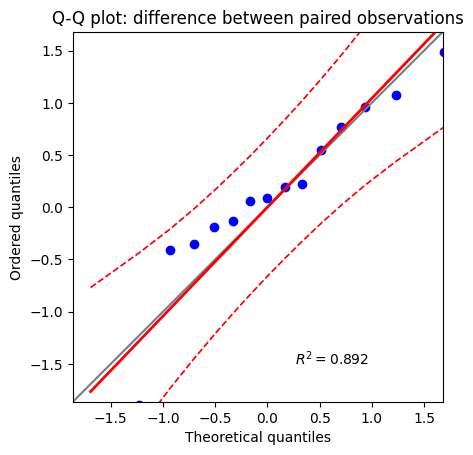

In [46]:
# Plotting Q-Q plot
pg.qqplot(
    differences_fert,
    dist='norm',
    confidence=0.95,)
plt.title("Q-Q plot: difference between paired observations");

While the paired t-test is also reasonably robust to moderate deviations from normality in the differences between paired observations, especially with larger sample sizes, severe violations can impact the accuracy of the test's results. When the normality assumption is not met for the differences, the calculated P value may be unreliable, potentially leading to incorrect conclusions about the statistical significance of the mean difference.

In such cases, we have a few options:

- Transform the differences: if the differences exhibit a clear pattern of non-normality, we might attempt to transform them to achieve a more normal distribution.
- Use a non-parametric alternative: when transformations are ineffective or impractical, we can consider a non-parametric test like the *Wilcoxon signed-rank test* (discussed in a later chapter), which does not rely on the normality assumption for the differences.
- Proceed with caution: if the sample size is relatively large and the deviations from normality in the differences are not severe, we might proceed with the paired t-test, acknowledging the potential limitations in the interpretation of the results.

#### Note on homoscedasticity

The assumption of *homoscedasticity*, or equal variances, is [crucial for the unpaired t-test](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html#homoscedasticity-testing), but it is not a requirement for the paired t-test.

The paired t-test focuses on the differences between paired observations. It inherently assumes that these *differences have a constant variance*. There's no need to test for equal variances between the two original groups, as the test operates on a single set of differences.

## Assessing the significance of paired difference mean

The central question in many research studies involving paired data is whether an intervention, treatment, or the passage of time leads to a meaningful change *within* the same group or individuals. In this section, we'll explore how the paired t-test enables us to answer this question by comparing the means of paired observations, effectively assessing the significance of the average change or difference.

### The t-ratio

At the core of the paired t-test also lies the **t-ratio** (or t-value, or t-score), a key statistic that quantifies the *magnitude of the average difference between paired observations relative to the variability of those differences*. The t-ratio used in the paired t-test shares a conceptual resemblance to both the [t-statistic used in confidence intervals for a single mean](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-statistic) and the [t-ratio used in the unpaired t-test](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html#the-t-ratio). All three involve a ratio of a difference (or an estimated parameter) to a measure of variability, and they follow a t-distribution. However, the t-ratio in the paired t-test specifically focuses on assessing the mean difference *within* the same group or individuals under different conditions, while the t-statistic for confidence intervals estimates a single population mean, and the t-ratio in the unpaired t-test compares the means of two independent groups.

#### Manual calculation

In this subsection, we'll delve into the mathematical underpinnings of the t-ratio in the context of the paired t-test, exploring how it incorporates the mean difference, the standard deviation of the differences, and the sample size to provide a standardized measure of the effect. Understanding the t-ratio is crucial for interpreting the results of the paired t-test and drawing meaningful conclusions about the statistical significance of any observed changes within the paired data.

In the paired t-test, we don't need to worry about unequal variances between two separate groups. Instead, we focus on the variance of the *differences* between the paired observations.

The t-ratio for the paired t-test is calculated as follows:

$$t = \frac{\bar{D}}{\sqrt{\frac{s_D^2}{n}}}$$

where:

* $\bar{D}$ is the mean of the differences between the paired observations $D_i = X_{1i} - X_{2i}$
* $s_D^2$ is the variance of the differences
* $n$ is the number of pairs (or the sample size)

The standard error of the mean difference, denoted by $s_{\bar D}$, is calculated as:

$$s_{\bar D} = \frac{s_D}{\sqrt{n}}$$

This standard error quantifies the uncertainty in our estimate of the mean difference.

We can then express the t-ratio as:

$$t = \frac{\bar{D}}{s_{\bar D}}$$

The degrees of freedom for this t-statistic are simply:

$$\mathrm{DF} = n - 1$$

where $n$ is the number of pairs.

In [47]:
# Calculate the standard error of the mean difference with se²=s²/n
se_diff = (differences_fert_stats.variance / differences_fert_stats.nobs)**.5

# Calculate the t-statistic for the paired t-test
t_statistic_paired = differences_fert_stats.mean / se_diff

# Calculate the degrees of freedom
df_paired = differences_fert_stats.nobs - 1

# Print the results
print(f"t-statistic (paired) = {t_statistic_paired:.5f} with {df_paired} degrees of freedom")

t-statistic (paired) = 2.14799 with 14 degrees of freedom


#### P value

Now that we have our t-statistic and degrees of freedom, we can determine the **P value** associated with our test, as well as construct a **confidence interval** for the true mean difference in the population. The P value will quantify the probability of observing a t-statistic as extreme as (or more extreme than) the one we calculated, assuming the null hypothesis of no difference between the paired observations is true. We will utilize the cumulative distribution function (CDF) of the [t-distribution](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-distribution) to compute this probability. The confidence interval will provide a range of plausible values for the true mean difference, giving us a sense of the magnitude of the effect and the uncertainty associated with our estimate.

In [48]:
# Calculate the P value using the t-distribution (two-sided test)
p_value_paired = 2 * (1 - stats.t.cdf(abs(t_statistic_paired), df_paired))

# Print the results
print(f"P value for the paired t-test = {p_value_paired:.5f}")

P value for the paired t-test = 0.04970


#### Visualizing the test results

To gain a deeper understanding of the results of the paired t-test, let's visualize the t-statistic, the critical t-values that define the rejection regions, and the areas under the t-distribution corresponding to the P value. This visual representation will help us grasp the statistical significance of the observed mean difference and the role of the degrees of freedom in shaping the t-distribution.

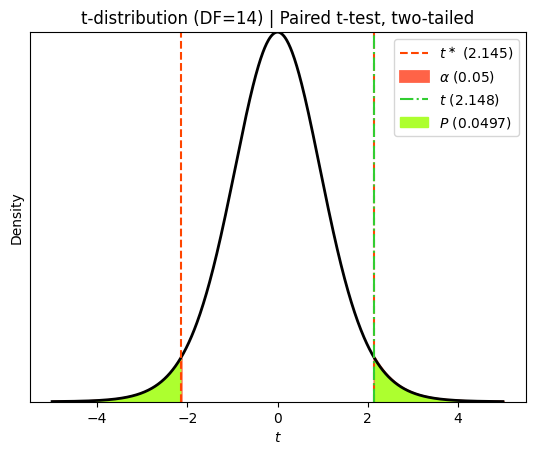

In [49]:
# Significance level (alpha)
alpha = 0.05

# Calculate critical t-values (two-tailed test)
t_crit_lower = stats.t.ppf(alpha/2, df_paired) 
t_crit_upper = stats.t.ppf(1 - alpha/2, df_paired) 

# Generate x values for plotting
x = np.linspace(-5, 5, 1000)
hx = stats.t.pdf(x, df_paired)

# Create the plot
plt.plot(x, hx, lw=2, color="black")

# Plot the critical t-values
plt.axvline(
    x=t_crit_lower, # type: ignore
    color='orangered',
    linestyle='--')

plt.axvline(
    x=t_crit_upper, # type: ignore
    color='orangered',
    linestyle='--',
    label=fr'$t^\ast$ ({t_crit_upper:.3f})')

# Shade the rejection regions (alpha)
plt.fill_between(
    x[x <= t_crit_lower],
    hx[x <= t_crit_lower],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr'$\alpha$ ({alpha})')

plt.fill_between(
    x[x >= t_crit_upper],
    hx[x >= t_crit_upper],
    linestyle="-",
    linewidth=2,
    color='tomato')

# Plot the observed t-statistic
plt.axvline(
    x=t_statistic_paired,
    color='limegreen',
    linestyle='-.',
    label=fr'$t$ ({t_statistic_paired:.3f})')

# Shade the P-value areas (two-tailed)
plt.fill_between(
    x[x <= -abs(t_statistic_paired)],
    hx[x <= -abs(t_statistic_paired)],
    color='greenyellow',
    label=fr'$P$ ({p_value_paired:.4f})')

plt.fill_between(
    x[x >= abs(t_statistic_paired)],
    hx[x >= abs(t_statistic_paired)],
    color='greenyellow')

# Add labels and title
plt.xlabel(r'$t$')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(f"t-distribution (DF={df_paired}) | Paired t-test, two-tailed")
plt.legend();

The red dashed lines in this diagram represent the critical t-values that define the *rejection regions* for a two-tailed paired t-test at a 5% significance level. The 'tails' of the curve outside these lines each represent 2.5% of the probability distribution under the null hypothesis (that the true population mean *difference* is zero).

The green dot-dashed line represents the observed t-statistic calculated from our sample data. The P value corresponds to the total probability of observing a t-statistic as extreme as (or more extreme than) the one we calculated, assuming the null hypothesis is true. In a two-tailed test like this, we consider *both tails of the distribution* because the true population mean *difference* could be either higher or lower than zero. One-tailed tests are used when we have a directional hypothesis, specifically testing if the *difference* is 'less than zero' or 'greater than zero'.

#### Confidence interval

A confidence interval provides a range of plausible values for the true difference in population means when comparing two paired groups. It gives us an idea of the *precision* of our estimate of this difference.

Since we're dealing with paired data, we'll use the differences between the paired observations to calculate the confidence interval. Here's how it's done:

1. Calculate the differences: for each pair of observations, calculate the difference $D_i = X_{1i} - X_{2i}$
2. Calculate the mean difference: calculate the mean of these differences $\bar{D}$. This is the point estimate of the true difference in population means
3. Calculate the standard deviation of the differences: calculate the standard deviation of the differences $s_D$
4. Calculate the standard error: the standard error of the mean difference for paired data is calculated as $s_D / \sqrt{n}$, where $n$ is the number of pairs
5. Determine the degrees of freedom: the degrees of freedom for a paired t-test are $n - 1$
6. Find the critical t-value ($t^\ast$): using the desired confidence level (e.g., 95%) and the calculated degrees of freedom, find the corresponding $t^\ast$ from the t-distribution table
7. Calculate the margin of error ($W$): multiply the standard error by the critical t-value
8. Construct the confidence interval: subtract and add the margin of error to the mean difference to obtain the lower and upper bounds of the confidence interval: $\bar{d} \pm W$

In [50]:
# Calculate the confidence interval (e.g., 95% confidence)
confidence_level = 0.95
margin_of_error_paired = stats.t.ppf((1 + confidence_level) / 2, df_paired) * se_diff
ci_paired = (
    differences_fert_stats.mean - margin_of_error_paired,
    differences_fert_stats.mean + margin_of_error_paired)

# Print the results
print(f"Paired difference mean (crossed - self) = {differences_fert_stats.mean:.3f}")
print(f"95% confidence interval for the mean difference: \
[{ci_paired[0]:.3f}, {ci_paired[1]:.3f}]")

Paired difference mean (crossed - self) = 2.617
95% confidence interval for the mean difference: [0.004, 5.229]


(test)=
### Performing the paired t-test in Python

Let's conduct the paired t-test using both the `scipy.stats` and `pingouin` libraries in Python. We'll compare their implementations and outputs, highlighting their respective advantages.

In [51]:
# Paired t-test using SciPy looking at the \bar{x} - \bar{y} difference
t_statistic_scipy_paired, p_value_scipy_paired = stats.ttest_rel(crossed_fertil, self_fertil)

# Paired t-test using Pingouin looking at the \bar{x} - \bar{y} difference
ttest_results_pingouin_paired = pg.ttest(x=crossed_fertil, y=self_fertil, paired=True)

# Print the results
print("Paired t-test results (SciPy):")
print(f"t-statistic = {t_statistic_scipy_paired:.3f}, P value = {p_value_scipy_paired:.4f}")

print("\nPaired t-test results (Pingouin):")
ttest_results_pingouin_paired

Paired t-test results (SciPy):
t-statistic = 2.148, P value = 0.0497

Paired t-test results (Pingouin):


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.147987,14,two-sided,0.049703,"[0.0, 5.23]",0.889908,1.544,0.892939


The paired t-test yielded a t-statistic of 2.148 with an associated P value of 0.0497. This P value is slightly less than the commonly used significance level of 0.05, suggesting *evidence to reject the null hypothesis of no difference between the paired measurements*. Therefore, we conclude that there is a statistically significant difference in the measurements before and after the intervention (or between the paired conditions).

Furthermore, the 95% confidence interval for the mean difference is [0.004, 5.229]. This suggests that we can be 95% confident that the true population mean difference lies within this range. The fact that this interval does not include zero further supports the conclusion that there is a significant difference between the paired measurements.

### Follow-up analyses

To gain a deeper understanding of the observed effect beyond statistical significance, we'll conduct some follow-up analyses. This will involve examining the effect size to quantify the magnitude of the difference and assessing the effectiveness of the pairing strategy employed in the experimental design.

#### Effect size

While the P value from the paired t-test informs us about the statistical significance of the observed mean difference, it doesn't reveal the *magnitude* of this difference. To gain a more comprehensive understanding of the effect, we turn to **effect size** measures. These statistics quantify the size of the effect in a standardized way, allowing us to gauge its practical significance and compare it across different studies or contexts.

In the context of paired t-tests, a common effect size measure is **Cohen's $d$**. It expresses the mean difference in terms of standard deviation units, providing a scale-free measure of the effect's size. We have previously encountered the effect size statistics in the chapter on statistical power and sample size, notably in the case of [comparison of two groups](https://sbwiecko.github.io/intuitive_biostatistics/20%20-%20Statistical%20Power%20and%20Sample%20Size.html#the-effect-size).

While the general idea of effect size remains the same, the specific calculation of Cohen's d for paired t-tests differs slightly, as it focuses on the standard deviation of the differences ($s_D$) between paired observations rather than the pooled standard deviation of two independent groups:

$$d = \frac{\bar{D}}{s_D}$$

where:

* $\bar{D}$ represents the mean of the differences between the paired observations
* $s_D$ represents the standard deviation of the differences

In [52]:
# Calculate Cohen's d manually for the paired t-test
cohens_d_manual_paired = differences_fert.mean() / differences_fert.std(ddof=1)

print(f"Cohen's d (manual, paired): {cohens_d_manual_paired:.3f}")

Cohen's d (manual, paired): 0.555


Conveniently, many statistical libraries automatically report Cohen's $d$ alongside the results of the paired t-test, for example [`compute_effsize` function provided by the Pingouin library](https://pingouin-stats.org/build/html/generated/pingouin.compute_effsize.html). Note that Pingouin applies a bias correction to Cohen's $d$, especially for smaller sample sizes. This correction adjusts for the fact that the sample standard deviation tends to slightly underestimate the population standard deviation. Your manual calculation might not include this correction.

In [53]:
# Calculate unbiased Cohen's d using pingouin for paired t-test
effect_size_pingouin_paired = pg.compute_effsize(crossed_fertil, self_fertil, paired=True, eftype='Cohen')
print(f"Unbiased Cohen's d (pingouin, paired): {effect_size_pingouin_paired:.3f}")

Unbiased Cohen's d (pingouin, paired): 0.890


The conventional interpretation of Cohen's d for paired t-tests aligns with the general guidelines:
* Small effect: $d \approx 0.2$
* Medium effect: $d \approx 0.5$
* Large effect: $d \approx 0.8$

In the current example, the large Cohen's $d$ of 0.89 suggests a substantial difference between the two conditions. Encountering a high P value (0.0497) with a large effect size suggests that while there might be a substantial effect present, the *study lacks sufficient power* to confidently detect it due to the *small sample size*. This underscores the importance of considering both P values and effect sizes when interpreting research findings and highlights the need for adequate sample sizes to draw reliable conclusions.

#### Evaluating the effectiveness of pairing

The paired t-test derives its power from the inherent connection or **correlation** between paired observations. This correlation, often arising from *repeated measures on the same subjects* or careful matching of pairs, allows the test to focus on the *differences* between the pairs, effectively reducing variability and increasing the sensitivity to detect true effects.

However, the success of the paired t-test hinges on the strength of this correlation. Ideally, when designing an experiment with paired samples, we aim for a *strong positive correlation* between the paired measurements, i.e., when one measurement in a pair increases, the other measurement also tends to increase (or if one decreases, the other also tends to decrease). This indicates that the pairing or matching process has been effective in controlling for extraneous factors and isolating the effect of interest.

In contrast, if the correlation between the paired observations is weak or absent, the paired t-test might not offer any advantage over an unpaired t-test. In fact, in some cases, the paired t-test might even have lower power due to the loss of degrees of freedom associated with the pairing.

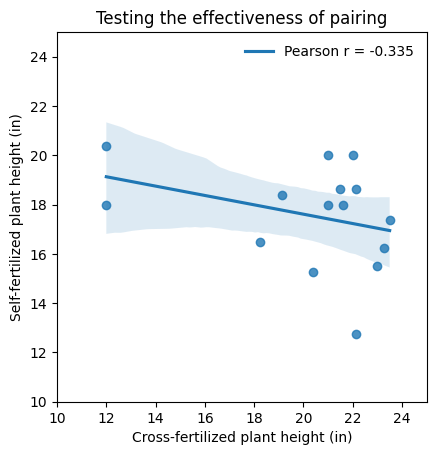

In [54]:
# Calculate the Pearson correlation coefficient
pearson_r = np.corrcoef(crossed_fertil, self_fertil)[0, 1]

# Create the scatterplot with regression line
ax = sns.regplot(
    x=crossed_fertil,
    y=self_fertil,
    line_kws={'label':f'Pearson r = {pearson_r:.3f}'},
    )

# Make the axes aspect ratio equal (square)
ax.set_aspect('equal')

# Set plot labels and title
plt.title('Testing the effectiveness of pairing')
plt.xlabel('Cross-fertilized plant height (in)')
plt.ylabel('Self-fertilized plant height (in)')

# Adjust plot limits for better visual clarity
plt.xlim(10, 25)
plt.ylim(10, 25)  # Ensure both axes have the same limits for easier comparison

# Add a legend with no frame
plt.legend(frameon=False);

In this dataset, the weak or absent correlation between paired observations suggests **ineffective pairing**, leading to high variability in the differences. This increased variability can obscure true effects, potentially resulting in a higher P value even when a substantial difference exists. Consequently, we might observe a large effect size (Cohen's d) but fail to achieve statistical significance due to the limited sample size and the noise introduced by ineffective pairing.

The current scenario, i.e., a high P value coupled with a large effect size, is more likely to occur when the pairing strategy is suboptimal. The large effect size hints at a meaningful difference, but the high variability arising from ineffective pairing hinders our ability to confidently detect it, especially with a small sample.

### Extensions of the paired t-test

#### One-sided t-test

In the context of cross-fertilization compared to self-fertilization, looking at the height variable, we can perform a **one-sided paired t-test** to investigate if cross-fertilization leads to a significant *increase* in plant height compared to self-fertilization.

Hypothesis:
* Null hypothesis (H0): the mean difference in height between cross-fertilized and self-fertilized plants is *less than or equal to zero*.
* Alternative hypothesis (H1): the mean difference in height between cross-fertilized and self-fertilized plants is *greater than zero*.

We choose a one-sided test because we have a specific directional hypothesis: we expect cross-fertilization to lead to *increased* height. We are not interested in the possibility that cross-fertilization might lead to a decrease in height.

In [55]:
pg.ttest(crossed_fertil, self_fertil, paired=True, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.147987,14,greater,0.024851,"[0.47, inf]",0.889908,3.088,0.948282


The data suggests that cross-fertilization likely leads to taller plants than self-fertilization, and this difference is not just due to random chance.

#### Ratio paired t-test

In some cases, we might be interested in comparing not just the absolute differences between paired observations, but also the *proportional* or *relative* changes. This is where the **ratio paired t-test** comes in. Instead of analyzing the differences directly, this test focuses on the ratios between the paired values. 

This approach is particularly useful when:

* The magnitude of the change is expected to be related to the *baseline* value. For example, a 5% increase in heart rate might be more meaningful for someone with a low baseline heart rate than for someone with a high baseline heart rate. 
* The data are measured on a ratio scale, where a zero value represents a true absence of the quantity being measured. Examples include weight, height, or concentration levels. 

The ratio paired t-test essentially performs a paired t-test on the **logarithms** of the ratios between the paired observations. This transformation allows us to analyze the proportional changes while still leveraging the benefits of the paired t-test framework. 

Consider a real-world scenario from Table 31.3 (page 312) of "Intuitive Biostatistics 4th Edition." This example examines if a drug can boost enzyme activity in cultured cells. Five distinct cell clones were used, with both control (untreated) and treated cells tested in parallel for each clone. This paired design helps account for any natural differences between the cell clones themselves. 

c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\pingouin\plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["wthn"] = data[within].replace({_ordr: i for i, _ordr in enumerate(order)})
c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\pingouin\plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["wthn"] = data[within].replace({_ordr: i for i, _ordr in enumerate(order)})


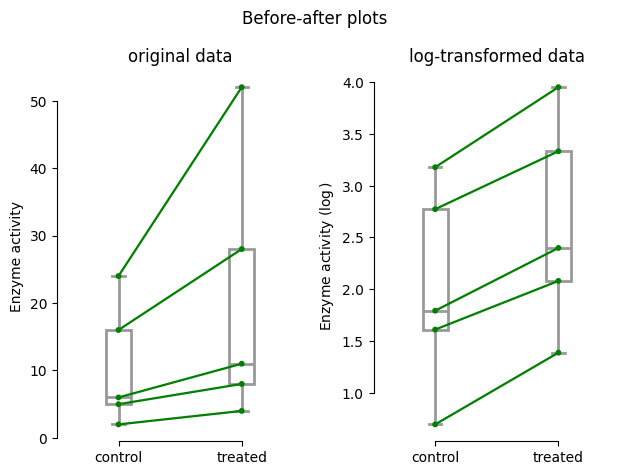

In [56]:
# Data
control = np.array([24, 6, 16, 5, 2])
treated = np.array([52, 11, 28, 8, 4])

# Create a DataFrame for Pingouin's plot_paired function
df = pd.DataFrame({'control': control, 'treated': treated})

# Add a 'subject' column to identify each pair
df['subject'] = range(1, len(control) + 1)

# Reshape the data into long format using `pd.melt()`
df_long = df.melt(id_vars='subject', var_name='condition', value_name='enzyme_activity')

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2)

# Left subplot: Before-After plot with original data
pg.plot_paired(
    data=df_long,
    dv="enzyme_activity",
    within="condition",
    subject="subject",
    boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1},
    ax=axes[0])
axes[0].set_title('original data')
axes[0].set_ylabel('Enzyme activity')
axes[0].set_xlabel('')

# Right subplot: Before-After plot with log-transformed data
# Apply log transformation to the 'enzyme_activity' column
df_long['log_enzyme_activity'] = np.log(df_long['enzyme_activity'])

pg.plot_paired(
    data=df_long,
    dv="log_enzyme_activity",
    within="condition",
    subject="subject",
    boxplot_kwargs={'color': 'white', 'linewidth': 2, 'zorder': 1},
    ax=axes[1])
axes[1].set_title('log-transformed data')
axes[1].set_ylabel(r'Enzyme activity ($\log$)')
axes[1].set_xlabel('')

plt.suptitle("Before-after plots")

# Adjust layout
plt.tight_layout()
sns.despine(trim=True);  # not default in Pingouin anymore

A visual comparison of the before-after plots reveals a stark difference between the original and log-transformed data. In the original scale, the data points appear somewhat scattered, with the changes between control and treated conditions varying considerably depending on the baseline enzyme activity. This heterogeneity in the changes hints at a potential *deviation from normality*, which could impact the validity of a standard paired t-test.

However, when we examine the log-transformed data, a striking pattern emerges. The lines connecting the paired observations now exhibit a remarkably consistent slope, suggesting a proportional change in enzyme activity across different baseline levels. This visual observation aligns with the assumption of the ratio paired t-test, where we expect the changes to be proportional rather than absolute. Furthermore, the log transformation often helps normalize data, potentially making the ratio paired t-test a more suitable approach for this dataset.

In [57]:
# Perform the paired t-test on the log-transformed data
# Remember we are analyzing \bar{x} - \bar{y}
ttest_results_paired = pg.ttest(
    x=np.log10(treated),
    y=np.log10(control),
    paired=True,
    confidence=.95)

ttest_results_paired

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.81437,4,two-sided,0.000294,"[0.21, 0.33]",0.619234,92.646,0.189218


This extremely low P value indicates strong evidence against the null hypothesis. In other words, we can confidently reject the idea that there is no difference in the log-transformed enzyme activity between the control and treated groups.

Moreover, the high positive t-value suggests a substantial difference between the log-transformed means. The positive sign indicates that the mean of the log-transformed treated group is significantly higher than the mean of the log-transformed control group.

Since we performed the t-test on log-transformed data, we need to interpret the results in terms of ratios or multiplicative changes rather than absolute differences.

In [58]:
# Extract the mean difference and confidence interval from the Pingouin results
mean_diff_log = np.mean(np.log10(treated) - np.log10(control))  # Mean difference on the log scale
ci_log = ttest_results_paired.loc['T-test', 'CI95%']          # 95% CI on the log scale

# Calculate the mean ratio and its confidence interval on the original scale
factor = 10 ** mean_diff_log
ci_original = (10 ** ci_log[0], 10 ** ci_log[1])

# Print the results
print(f"On average, the treatment multiplies enzyme activity by {factor:.3f}, \
with 95% CI from {ci_original[0]:.2f} to {ci_original[1]:.2f}")

On average, the treatment multiplies enzyme activity by 1.860, with 95% CI from 1.62 to 2.14


A ratio of 1.86 signifies that the treated group's enzyme activity is, on average, 1.86 times the activity in the control group. This translates to an $(1.86 - 1) * 100 = 86\%$ increase.

Furthermore, the confidence interval (1.62, 2.14) provides a range of plausible values for the true population mean ratio. Importantly, it doesn't contain 1.0. Since a ratio of 1.0 would indicate no effect (treated and control groups being the same), the absence of 1.0 in the confidence interval strengthens the conclusion that the observed increase is statistically significant and unlikely due to chance.

#### McNemar's test

McNemar's test, occasionally referred to as the "within-subjects chi-squared test," is specifically designed to analyze paired data when the outcome is dichotomous or binary, meaning there are only two possible categories (e.g., yes/no, success/failure). It's particularly useful for assessing changes in responses or preferences within the same individuals or matched pairs over time or under different conditions.

The McNemar test utilizes a 2x2 table to summarize paired data with a *binary outcome*. The following table represents the possible outcomes:

|                     | Outcome 2: positive | Outcome 2: negative |
| ------------------- |:-------------------:|:-------------------:|
| Outcome 1: positive |          a          |          b          |
| Outcome 1: negative |          c          |          d          |

where:

* "Outcome 1" and "Outcome 2" represent the two measurement points or conditions being compared (e.g., before and after treatment, control vs. experimental group).
* "Positive" and "Negative" represent the two possible outcomes for each measurement (e.g., success/failure, presence/absence).
* The cells 'a', 'b', 'c', and 'd' represent the counts of pairs falling into each combination of outcomes.

McNemar's test focuses on the **discordant pairs** ('b' and 'c'), where the outcome changed between the two measurements. These pairs are crucial for assessing whether there's a statistically significant difference in the proportions of positive outcomes between the two conditions. 

The McNemar's test statistic, often denoted as $\chi^2$ or sometimes $Q$, is calculated as $\chi^2 = \frac{(| b - c | - \mathrm{correction})^2}{b + c}$, where $b$ and $c$ represent the counts of discordant pairs, and $\mathrm{correction}$ is Yates's continuity correction, typically set to 0.5 or 1 depending on the software. The McNemar's test statistic, under the null hypothesis, approximately follows a chi-squared distribution with one degree of freedom. However, this approximation can be less accurate for smaller sample sizes. Yates' continuity correction is applied to improve the accuracy of this approximation by adjusting the calculated chi-squared value slightly downwards. This adjustment helps prevent the overestimation of statistical significance (i.e., finding a significant result when there isn't one) when dealing with smaller sample sizes or low expected frequencies in the contingency table.

Let's examine a case-control study exploring the connection between a risk factor (for instance, smoking) and a disease (like lung cancer). Data is gathered in pairs: each person with the disease (a "case") is paired with someone without it (a "control"), ensuring they're similar in age, gender, etc. The researchers examined a total of 134 cases and their corresponding controls, and the outcomes are summarized in the following table. 

|                  | Cases (Risk+) | Cases (Risk-) |
| ---------------- |:-------------:|:-------------:|
| Controls (Risk+) |       13      |        4      |
| Controls (Risk-) |       25      |       92      |

The table shows the number of pairs falling into each combination of exposure status (risk factor present or absent) for cases and controls.
* The 13 pairs where both cases and controls were exposed to the risk factor, as well as the 92 pairs where neither was exposed, provide no information about the association between the risk factor and the disease. These are the **concordant pairs**. 
* The remaining pairs (4 and 25) are the **discordant pairs**, where the case and control have different exposure statuses. These pairs are crucial for assessing the association. 

This isn't exactly a contingency table in the traditional sense. The actual contingency table would look like this: 

|         | Risk Factor + | Risk Factor - | Total |
| --------|:-------------:|:-------------:| ----- |
| Case    |       38      |       96      |  134  |
| Control |       17      |      117      |  134  |
| Total   |       55      |      213      |  268  |

McNemar's test focuses on these discordant pairs to determine if there's a statistically significant difference in the proportions of cases and controls exposed to the risk factor.

In [59]:
table = np.array(
    [
        [13, 4],
        [25, 92]
    ]
)

# Extract discordant pair counts from the contingency table
b = table[0, 1]  # Count of cases exposed, controls not exposed
c = table[1, 0]  # Count of cases not exposed, controls exposed

# Calculate the McNemar test statistic with Yates' continuity correction
mcnemar_statistic = (abs(b - c) - 1)**2 / (b + c)

# Print the calculated statistic
print("McNemar's statistic:", round(mcnemar_statistic, 3))

McNemar's statistic: 13.793


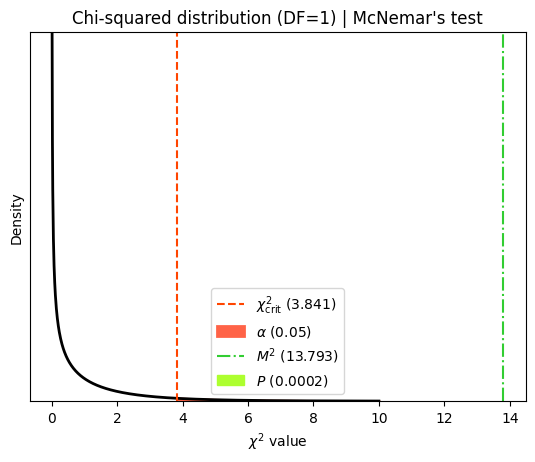

In [60]:
from scipy.stats import chi2

# Significance level (alpha)
alpha = 0.05

# Calculate critical chi-squared value
chi2_crit = chi2.ppf(1 - alpha, 1)  # 1 degree of freedom

# Generate x values for plotting
x = np.linspace(0, 10, 1000)  # Adjust range as needed
hx = chi2.pdf(x, 1)  # Chi-squared PDF with 1 degree of freedom

# Create the plot
plt.plot(x, hx, lw=2, color="black")

# Plot the critical chi-squared value
plt.axvline(
    x=chi2_crit, # type: ignore
    color='orangered',
    linestyle='--',
    label=r"$\chi^2_\text{crit}$" + f" ({chi2_crit:.3f})")

# Shade the rejection region (alpha)
plt.fill_between(
    x[x >= chi2_crit],
    hx[x >= chi2_crit],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr'$\alpha$ ({alpha})')

# Plot the observed chi-squared statistic
plt.axvline(
    x=mcnemar_statistic,
    color='limegreen',
    linestyle='-.',
    label=fr"$M^2$ ({mcnemar_statistic:.3f})")

# Shade the P-value area
plt.fill_between(
    x[x >= mcnemar_statistic],
    hx[x >= mcnemar_statistic],
    color='greenyellow',
    label=fr'$P$ ({1 - chi2.cdf(mcnemar_statistic, 1):.4f})'  # Calculate P value
)

# Add labels and title
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(f"Chi-squared distribution (DF=1) | McNemar's test")
plt.legend();

We can easily conduct McNemar's test using either the free web calculator available in the [QuickCalcs section of graphpad.com]((https://www.graphpad.com/quickcalcs/mcNemar1/)) or by utilizing the [`statsmodels` library in Python](https://www.statsmodels.org/dev/generated/statsmodels.stats.contingency_tables.mcnemar.html).

In [61]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(
    table,
    exact=False,  # exact=False uses the chi-square distribution instead of binomial distribution
    correction=True))

pvalue      0.00020408400998040742
statistic   13.793103448275861


In this specific case, the $\chi^2$ value is 13.79 with one degree of freedom. This results in a two-tailed P value of 0.0002. In simpler terms, if there was truly no link between the risk factor and the disease, the chance of observing an odds ratio this far from 1.0 (indicating no association) is merely 0.02 percent.

Instead of getting caught up in the complexities of the chi-square approximation and whether or not to apply Yates' correction (and which version to use), it is suggested opting for the binomial test. This provides an exact result, eliminating the need for such approximations and corrections.

In [62]:
print(mcnemar(table, exact=True))

pvalue      0.00010371580719947815
statistic   4.0


#### Bayesian approach

In contrast to frequentist statistics, which focuses on the probability of observing data given a fixed hypothesis (P values), the Bayesian approach calculates the probability of a hypothesis being true given the observed data. This is achieved by combining prior knowledge (represented by a prior distribution) with the likelihood of the data to obtain a posterior distribution, which reflects our updated belief about the hypothesis after observing the data.

We previously introduced the Bayesian approach in the chapter on confidence intervals, where we focused on [estimating a single population mean](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#bayesian-approach).
In the context of the paired t-test, a Bayesian approach would estimate the probability distribution of the true mean difference, allowing us to make statements like "There's a 95% probability that the true mean difference lies between these two values."

In [63]:
# Perform Bayesian estimation of the mean difference
bayes_result = stats.bayes_mvs(differences_fert, alpha=0.95)

# Extract and print the results
posterior_mean = bayes_result[0][0]
credible_interval = bayes_result[0][1]

print(f"Bayesian estimate of the mean difference: {posterior_mean:.3f}")
print(f"95% credible interval for the mean difference: \
[{credible_interval[0]:.3f}, {credible_interval[1]:.3f}]")

Bayesian estimate of the mean difference: 2.617
95% credible interval for the mean difference: [0.004, 5.229]


In [64]:
# In fact many more information can be accessed
bayes_result

(Mean(statistic=2.6166666666666667, minmax=(0.00389916480019048, 5.2294341685331425)),
 Variance(statistic=25.969965277777774, minmax=(11.931551867861122, 55.36591719484016)),
 Std_dev(statistic=4.991122961308315, minmax=(3.45420784954541, 7.440827722427134)))

While this brief introduction provides a glimpse into the Bayesian perspective on paired t-tests, it's important to recognize that Bayesian statistics is a vast and nuanced field. The choice of prior distributions, model selection, and computational techniques can significantly influence the results and interpretation of Bayesian analyses. Delving deeper into the intricacies of Bayesian inference would require a dedicated text, beyond the scope of this introductory chapter. However, for those intrigued by the potential of Bayesian methods, we encourage further exploration of this powerful statistical framework.

## Bootstrapping and permutation tests for paired data

**Bootstrapping** offers a robust alternative for statistical inference, particularly useful when dealing with small sample sizes or when the assumptions of traditional parametric tests might not be fully met. Bootstrapping allows us to estimate parameters and confidence intervals directly from the data itself, without relying on strong assumptions about the underlying population distribution. This approach, known as **non-parametric inference**, was previously encountered in the [chapter on calculating the confidence interval of a mean (univariate)](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#resampling), as well as in the [chapter on comparing two means with unpaired t test](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html).

While bootstrapping is primarily used for estimation, **permutation tests**, another resampling-based method, are specifically designed for *hypothesis testing*. They can be employed to test various hypotheses, such as the null hypothesis of exchangeability (where group labels are irrelevant) or the hypothesis of equal means after shifting the group means to a common value.

Recent research has explored the application of bootstrap and permutation methods to *paired data*, particularly when the distributions of the paired differences might deviate from normality. A [study by Konietschke and Pauly (2014)](https://link.springer.com/article/10.1007/s11222-012-9370-4) demonstrated that even when the data may not be perfectly exchangeable under the null hypothesis, certain permutation and bootstrap approaches can provide valid and powerful alternatives to the traditional t-test. These methods, which may involve resampling or permuting the data while accounting for the dependency structure within pairs, have been shown to improve the power of the test under conditions of non-normality. This highlights the potential of bootstrap and permutation methods to provide more robust and reliable inferences in situations where the assumptions of the paired t-test might be violated.

### Generating bootstrap pair samples

The core idea behind bootstrapping remains the same as for unpaired observations: treat our observed sample as a miniature representation of the population. However, in the context of paired data, we resample the *pairs* of observations, preserving the crucial relationship between the two measurements within each pair. We repeatedly resample (with replacement) from our original set of pairs to create multiple bootstrap samples. Each replicate is a new dataset of the same size, but now consisting of these resampled pairs. 

For each bootstrap sample, we calculate the statistic of interest, i.e., in this case, the mean difference between the paired measurements. This generates a **bootstrap distribution** of paired differences mean, which serves as an approximation of how this statistic would vary if we were to repeatedly sample pairs from the population.

In [65]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 10000 bootstrap replicates of the mean difference
n_replicates = 10000
bs_differences_means = np.array([
    np.mean(
        np.random.choice(
            differences_fert,
            size=len(differences_fert),
            replace=True
        )) for _ in range(n_replicates)
    ])

print(bs_differences_means[:6])  # print the 6 first replicates

[3.41666667 3.40833333 3.375      0.775      1.80833333 3.65      ]


### Estimate of the confidence interval for the paired difference mean

Once we have the bootstrap distribution of the *paired difference means*, we can estimate the confidence interval by finding the percentiles corresponding to the desired confidence level. 

For a 95% confidence interval, we typically use the 2.5th and 97.5th percentiles of the bootstrap distribution of the difference means. This means that 95% of the bootstrap estimates of the paired difference mean fall within this interval, providing a range of plausible values for the true population mean difference.

In [66]:
# Calculate the 95% confidence interval using np.percentile
bs_CI_diff_means = np.round(np.percentile(bs_differences_means, [2.5, 97.5]), 2)

# Print the results
print(f"Bootstrap estimate of the mean paired difference = {np.mean(bs_differences_means):5.2f}")
print(f"Corresponding 95% CI estimate = {bs_CI_diff_means}")

Bootstrap estimate of the mean paired difference =  2.63
Corresponding 95% CI estimate = [0.16 4.76]


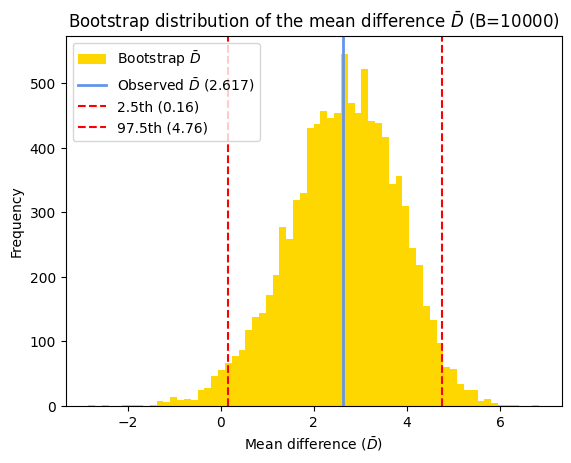

In [67]:
# Plot the histogram of the bootstrap distribution of mean paired differences
plt.hist(
    bs_differences_means,
    density=False,
    bins='auto',
    color='gold',
    label=r'Bootstrap $\bar D$')

# Annotate the observed mean difference
plt.axvline(
    x=differences_fert_stats.mean,  # type: ignore
    color='cornflowerblue',
    linestyle='-', lw=2,
    label=fr'Observed $\bar D$ ({differences_fert_stats.mean:.3f})')

# Add lines for the confidence interval
plt.axvline(
    x=bs_CI_diff_means[0],
    color='red',
    linestyle='--',
    label=f'2.5th ({bs_CI_diff_means[0]:.2f})')
plt.axvline(
    x=bs_CI_diff_means[1],
    color='red',
    linestyle='--',
    label=f'97.5th ({bs_CI_diff_means[1]:.2f})')

# Add labels and title
plt.xlabel(r'Mean difference ($\bar D$)')
plt.ylabel('Frequency')
plt.title(fr"Bootstrap distribution of the mean difference $\bar D$ (B={n_replicates})")
plt.legend();

It's generally expected that the confidence interval obtained through bootstrapping (here [0.16, 4.76]) will be reasonably similar to the confidence interval calculated using the t-distribution (here [0.004, 5.229]), especially when the sample size is sufficiently large and the underlying assumptions of the paired t-test are met.

Interestingly, in this case, the confidence interval obtained through bootstrapping is narrower than the one derived from the t-distribution. This might seem counterintuitive, as we generally expect wider confidence intervals with smaller sample sizes due to increased uncertainty. However, bootstrapping can be less sensitive to violations of the normality assumption (which the paired t-test relies on), potentially leading to a narrower interval when the distribution of the paired differences deviates from normality.

### Bootstrapping with Pingouin

The [`compute_bootci`](https://pingouin-stats.org/build/html/generated/pingouin.compute_bootci.html) method from the `pingouin` library proves to be a valuable asset in such scenarios, as it streamlines the process of generating confidence intervals using bootstrapping. It eliminates the need for manual creation of bootstrap samples, offering a variety of methods for confidence interval computation, including the normal approximation, percentile bootstrap, and bias-corrected percentile method. Additionally, it provides the flexibility to return the entire bootstrap distribution, enabling further exploration and visualization of the resampling results.

In [68]:
import pingouin as pg

# Calculate 95% percentile bootstrap confidence interval using pingouin
bs_ci, bt = pg.compute_bootci(
    x=differences_fert,  # Use the array of paired differences
    func=np.mean,        # Calculate the mean of each bootstrap sample
    confidence=0.95,
    method='per',
    seed=1234,
    decimals=3,
    n_boot=10000,
    return_dist=True)

print(bt[:10])  # Print the first 10 bootstrap replicate means
print(
    f"95% percentile bootstrap confidence interval (pingouin): ({bs_ci[0]:.3f}, {bs_ci[1]:.3f})")

[1.525      0.53333333 4.33333333 1.19166667 1.76666667 3.875
 3.075      3.35       1.75833333 2.01666667]
95% percentile bootstrap confidence interval (pingouin): (0.192, 4.750)


### Bootstrap P value for paired data

Similar to the [unpaired t-test](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html#bootstrap-p-value), bootstrapping and permutation tests offer flexibility in hypothesis testing for paired data as well. We can employ resampling techniques to generate data under the null hypothesis, allowing us to compute P values. The key lies in choosing a relevant test statistic and calculating it consistently for both the original and resampled data.

In the context of a paired t-test, the t-statistic and the mean (paired) difference serve as natural and straightforward test statistics. However, we can also explore other statistics like the *median difference* or even specific *quantile differences* if the research question demands it.

#### Bootstrapped t-statistics of shifted differences

We can adapt [Bradley Efron's bootstrapping algorithm](https://academic.oup.com/biomet/article-abstract/68/3/589/218600?redirectedFrom=fulltext&amp;login=false) for the paired t-test scenario. The core idea remains the same: shift the data to simulate the null hypothesis. However, instead of [shifting individual groups](https://sbwiecko.github.io/intuitive_biostatistics/30%20-%20Comparing%20Two%20Means%20with%20Unpaired%20t%20Test.html#bootstrapped-t-statistics-of-shifted-data), we shift the *differences* within each pair to have a common mean of **zero** (representing no difference under the null hypothesis).

Specifically, we create a new dataset of *shifted differences* as $d_i' = d_i - \bar d$, where $d_i$ are the original paired differences and $\bar d$ is their mean. 

Next, we perform the following steps B times (e.g., B = 10000):

1. Draw a bootstrap sample $d_i^*$ of size $n$ with replacement from the shifted differences $d_i'$.
2. Calculate the t-statistic $t^*$ using the bootstrap sample $d_i^*$.

Finally, we estimate the P value as the proportion of bootstrap t-statistics that are as extreme as or more extreme than the observed t-statistic $t$ from our original data:

$$p = \frac{\sum_{i=1}^B I\{t_i^* \ge t \}}{B} | t \gt 0$$

where $I\{\text{condition}\} = 1$ if the *condition* is true and $0$ otherwise. Note that we use the absolute values of the t-statistics to account for both tails of the distribution in a two-sided test. This P value represents the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated from our original paired data, assuming the null hypothesis (H0) of no mean difference is true.

In a paired test, we're often interested in whether the difference between paired measurements is consistently in a *specific direction*. A positive statistic suggests a positive difference, while a negative statistic suggests a negative difference. Therefore, if the observed test statistic is negative, the P value is the proportion of bootstrapped test statistics that are less than or equal to the observed test statistic:

$$p = \frac{\sum_{i=1}^B I\{t_i^* \le t \}}{B} | t \lt 0$$

In [69]:
# Set the random seed for reproducibility
np.random.seed(111)

n_replicates = 10000

# Shift the paired differences to have a mean of zero (simulating the null hypothesis)
shifted_differences = differences_fert - differences_fert_stats.mean # type: ignore

# Generate 10000 bootstrap replicates of the shifted differences
bs_shifted_diffs = np.array([
    np.random.choice(shifted_differences, size=differences_fert_stats.nobs, replace=True)
    for _ in range(n_replicates)
])

# Calculate the mean and standard deviation for each bootstrap replicate
bs_shifted_diffs_means = np.mean(bs_shifted_diffs, axis=1)
bs_shifted_diffs_stds = np.std(bs_shifted_diffs, ddof=1, axis=1)  # Sample standard deviation

# Calculate the standard error for each replicate
bs_se = bs_shifted_diffs_stds / differences_fert_stats.nobs**.5

# Calculate the t-statistic for each bootstrap replicate
bs_t_statistic = bs_shifted_diffs_means / bs_se

# Print the first 15 t-statistics from the bootstrap replicates
print(bs_t_statistic[:15])

[ 1.08228839  0.5891132   0.83625618 -1.43918435 -0.55298715  0.92978128
  0.140706    1.14955388  0.29781496 -0.73463324  2.46303042 -0.24038272
  0.75223906  0.58088937 -0.39851653]


In [70]:
# Calculate the P value using bootstrapping, considering the direction of the observed t-statistic
if t_statistic_paired >= 0:
    p_value_bs_shifted = np.sum(bs_t_statistic >= t_statistic_paired) / len(bs_t_statistic)
else:
    p_value_bs_shifted = np.sum(bs_t_statistic <= t_statistic_paired) / len(bs_t_statistic)

# Print the P value
print(f"P value obtained using bootstrapped t-statistics = {p_value_bs_shifted:.4f}")

P value obtained using bootstrapped t-statistics = 0.0681


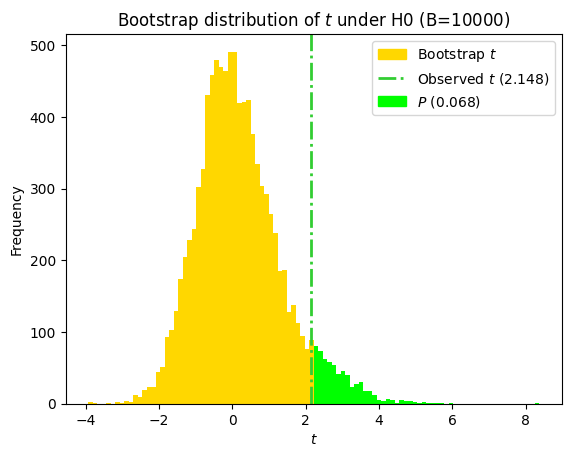

In [71]:
import matplotlib.patches as mpatches

# Plot the histogram of the bootstrap t-statistics
hist, bins, patches = plt.hist(
    bs_t_statistic,
    density=False,
    bins=int(n_replicates**.5),
    color='gold',
)

# Annotate the observed t-statistic
plt.axvline(
    x=t_statistic_paired,
    color='limegreen',
    linestyle='-.', lw=2,
    label=fr'Observed $t$ ({t_statistic_paired:.3f})')

# Determine the direction of the observed t-statistic and plot accordingly
if t_statistic_paired >= 0:
    # Plot the histogram of the bootstrap t-statistics >= observed t-statistic
    extreme_t_stats = bs_t_statistic[bs_t_statistic >= t_statistic_paired]
    # Change the color of the bars based on the direction parameter
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge >= extreme_t_stats):
            patches[i].set_facecolor('lime') # type: ignore
else:
    # Plot the histogram of the bootstrap t-statistics <= observed t-statistic
    extreme_t_stats = bs_t_statistic[bs_t_statistic <= t_statistic_paired]
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge <= extreme_t_stats):
            patches[i].set_facecolor('lime') # type: ignore

# Add labels and title
plt.xlabel(r'$t$')
plt.ylabel('Frequency')
plt.title(fr"Bootstrap distribution of $t$ under H0 (B={n_replicates})")

# Create a copy of the original patch for the legend
original_patch = mpatches.Patch(color='gold', label=r'Bootstrap $t$')
# Create a patch for the legend
p_value_patch = mpatches.Patch(color='lime', label=fr'$P$ ({p_value_bs_shifted:.3f})')

# Add the patches to the legend
plt.legend(handles=[original_patch, plt.gca().lines[0], p_value_patch]); # type: ignore

#### P value via permutation

When conducting a paired t-test, permutation tests are often the preferred resampling method for creating data that would be expected if the null hypothesis were true. In this approach, we randomly *flip the sign* of each difference within a pair (changing X-Y to Y-X). This shuffling maintains the variation *between* different pairs, but it only keeps the original pattern of differences *within* each pair if the true average difference is actually zero (as the null hypothesis states).

In [72]:
def permute_paired_differences(differences):
    """
    Generates a permuted sample of paired differences under the null hypothesis.
    
    Args:
        differences: An array of paired differences.

    Returns:
        A new array with randomly negated differences within each pair.
    """

    # Randomly generate -1 or 1 for each pair
    signs = np.random.choice([-1, 1], size=len(differences))

    # Multiply each difference by its corresponding sign
    permuted_differences = differences * signs
    return permuted_differences

Next, we determine how frequently these permuted differences are as extreme as, or even more extreme than, the observed mean difference in our original data. This proportion represents the P value. In essence, it tells us the likelihood of observing a difference as large (or larger) as the one we found, purely by chance, if there were truly no difference between the groups (i.e., if the null hypothesis were true).

In [73]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 10,000 bootstrap replicates of the mean difference for each permutation sample
n_replicates = 10000

# Initialize an empty array to store the permuted mean differences
permuted_diffs_means = np.zeros(n_replicates)

# Generate permuted mean differences
for i in range(n_replicates):
    # Permute the differences
    permuted_diffs = permute_paired_differences(differences_fert)
    
    # Calculate the mean difference for this permuted sample
    permuted_diffs_means[i] = np.mean(permuted_diffs)

# Generate permuted mean differences using a list comprehension
# permuted_diffs_means = np.array(
#     [np.mean(permute_paired_differences(differences_fert)) for _ in range(n_replicates)])

# Print the first 6 replicate difference means
print(permuted_diffs_means[:6])

[ 0.88333333 -2.11666667 -0.1         0.78333333 -0.95       -2.03333333]


In [74]:
# Calculate the P value using bootstrapping, considering the direction of the observed paired difference mean
if differences_fert_stats.mean >= 0:
    p_value_permutation = np.sum(permuted_diffs_means >= differences_fert_stats.mean) / len(permuted_diffs_means)
else:
    p_value_permutation = np.sum(permuted_diffs_means <= differences_fert_stats.mean) / len(permuted_diffs_means)

# Print the p-value
print(f"P-value obtained using permutation test (mean difference) = {p_value_permutation:.4f}")

P-value obtained using permutation test (mean difference) = 0.0264


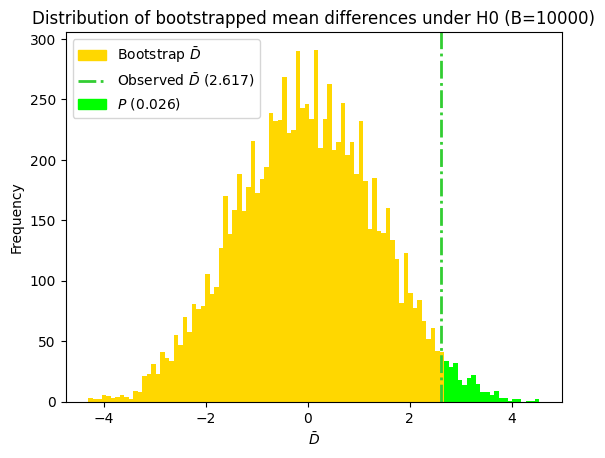

In [75]:
# Plot the histogram of the permuted mean differences
hist, bins, patches = plt.hist(
    permuted_diffs_means,
    density=False,
    bins=int(n_replicates**.5),
    color='gold',
)

# Annotate the observed mean difference
plt.axvline(
    x=differences_fert_stats.mean,  # type: ignore
    color='limegreen',
    linestyle='-.', lw=2,
    label=fr'Observed $\bar D$ ({differences_fert_stats.mean:.3f})')

# Determine the direction of the observed mean difference and plot accordingly
if differences_fert_stats.mean >= 0:
    # Plot the histogram of the mean differences >= observed mean difference 
    extreme_diffs = permuted_diffs_means[permuted_diffs_means >= differences_fert_stats.mean]
    # Change the color of the bars based on the direction parameter
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge >= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore
else:
    # Plot the histogram of the mean differences <= observed mean difference
    extreme_diffs = permuted_diffs_means[permuted_diffs_means <= differences_fert_stats.mean]
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge <= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore

# Add labels and title
plt.xlabel(r'$\bar D$')
plt.ylabel('Frequency')
plt.title(f"Distribution of bootstrapped mean differences under H0 (B={n_replicates})")

# Create a copy of the original patch for the legend
original_patch = mpatches.Patch(color='gold', label=r'Bootstrap $\bar D$')
# Create a patch for the legend
p_value_patch = mpatches.Patch(color='lime', label=fr'$P$ ({p_value_permutation:.3f})')

# Add the patches to the legend
plt.legend(handles=[original_patch, plt.gca().lines[0], p_value_patch]); # type: ignore

The analysis of the data using different statistical approaches yielded somewhat mixed results regarding the significance of the observed difference between the paired groups.

* Frequentist approach (paired t-test): the P value of 0.0497 suggests a statistically significant difference at the conventional alpha level of 0.05, though the result is borderline.
* Bootstrap with shifted differences: the P value of 0.0681 indicates that the observed difference is not statistically significant at the 0.05 level.
* Permutation test: the P value of 0.0264 suggests a statistically significant difference, providing stronger evidence for a difference than the frequentist test.

The discrepancy between the bootstrapping approach and the other two methods might be attributed to the bootstrapping procedure's sensitivity to the specific sample at hand. With small sample sizes, bootstrap results can sometimes exhibit greater variability.

Overall, while the permutation test provides the strongest evidence for a statistically significant difference, the  frequentist test also suggests a potential effect, albeit a weaker one. The bootstrapping results are less conclusive. Given the potential limitations of bootstrapping with small samples, it's advisable to interpret these findings with caution. Further investigation with a larger sample size or additional analyses might be warranted to confirm the presence of a true effect.

## Conclusion

This chapter has provided a comprehensive guide to the paired t-test, a powerful statistical method for analyzing differences between paired observations. We began by establishing the foundations of the test, emphasizing its focus on assessing changes within matched pairs or repeated measurements. We then explored the crucial steps involved in preparing data for hypothesis testing, including descriptive statistics, visualization techniques, and assessing the normality assumption.

The core of the chapter delved into the mechanics of the paired t-test, explaining the t-ratio, its manual calculation, and its interpretation in terms of P values and confidence intervals. We demonstrated how to leverage Python libraries like `scipy.stats` and `pingouin` to streamline the analysis process and gain deeper insights from the results.

Furthermore, we extended our exploration to encompass variations and extensions of the paired t-test, including one-sided tests for directional hypotheses, ratio paired t-tests for analyzing proportional changes, the McNemar test for paired categorical data, and a brief introduction to the Bayesian approach for estimating the probability distribution of the mean difference.

Finally, we touched upon the potential of bootstrap and permutation methods to provide robust alternatives to the paired t-test, particularly when dealing with non-normal data or violations of the test's assumptions.

By combining theoretical understanding with practical implementation and a consideration of various extensions and alternatives, this chapter has equipped you with the knowledge and tools to confidently apply the paired t-test in your own research endeavors. Remember that careful consideration of the research question, data characteristics, and appropriate statistical techniques is crucial for drawing meaningful and valid conclusions from paired data.

## Cheat sheet

### Descriptive statistics and visualization

```python
differences = data1 - data2

# Concatenate the data in a DataFrame for some operations
data_diffs = pd.concat(
    [data1, data2],
    keys=['data1', 'data2'],
    axis=1)

# Descriptive statistics
import scipy.stats as stats
stats.describe(differences)

# Boxplots
import matplotlib.pyplot as plt
import seaborn as sns
sns.stripplot(y=differences)
sns.boxplot(y=differences,)

# Before-after plots
import pingouin as pg
pg.plot_paired(
    # We need to reshape the DataFrame in the long format
    data=data_diffs.reset_index().melt(
        value_vars=['data1', 'data2'],
        id_vars='index',
        var_name='variable',
        value_name='value'),
    dv='value',
    within='variable',
    subject='index',)
```

### Assessing assumptions

#### Normality testing

```python
# Using scipy.stats
# D'Agostino-Pearson K² test
stats.normaltest(differences)
# Shapiro-Wilk
stats.shapiro(differences)

# Using pingouin
pg.normality(differences, method='normaltest')
pg.normality(differences, method='normaltest')
```

#### Q-Q plot

```python
pg.qqplot(differences, dist='norm', confidence=0.95)
```

### T-test

```python
# Using scipy.stats
stats.ttest_rel(data1, data2)

# Using pingouin
pg.ttest(x=data1, y=data2, paired=True)

# One-sided t-test
pg.ttest(data1, data2, paired=True, alternative='greater')

# Ratio paired t-test
# Perform the paired t-test on the log-transformed data
pg.ttest(
    x=np.log10(data1),
    y=np.log10(data2),
    paired=True,)

# McNemar's test
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(table, exact=False, correction=True))

# Bayesian estimation
table = np.array([[a, b], [c, d]])
stats.bayes_mvs(differences, alpha=0.95)

# Effect size (Cohen's d)
# Calculate unbiased Cohen's d using pingouin
pg.compute_effsize(x, y, paired=True, eftype='Cohen')
```

### Bootstrapping and permutation tests

#### Bootstrap pair samples

```python
# Generate B bootstrap replicates of the mean difference, with replacement
n_replicates = 10000
differences_means = np.array([
    np.mean(
        np.random.choice(
            differences,
            size=len(differences),
            replace=True
        )) for _ in range(n_replicates)
    ])

# Confidence interval
np.percentile(differences_means, [2.5, 97.5])

# Bootstrapping with Pingouin
bs_ci, bt = pg.compute_bootci(x=differences, func=np.mean, return_dist=True)
```

#### P value

##### Bootstrapped t-statistics of shifted differences

```python
# Shift the paired differences to have a mean of zero (simulating the null hypothesis)
shifted_differences = differences - np.mean(differences)

# Generate B bootstrap replicates of the shifted differences
bs_shifted_diffs = np.array([
    np.random.choice(shifted_differences, size=len(differences), replace=True)
    for _ in range(n_replicates)
])

# Calculate the mean and standard deviation for each bootstrap replicate
bs_shifted_diffs_means = np.mean(bs_shifted_diffs, axis=1)
bs_shifted_diffs_stds = np.std(bs_shifted_diffs, ddof=1, axis=1)

# Calculate the standard error for each replicate
bs_se = bs_shifted_diffs_stds / np.sqrt(len(differences))

# Calculate the t-statistic for each bootstrap replicate
bs_t_statistic = bs_shifted_diffs_means / bs_se

# Calculate the P value using bootstrapping, considering the direction of the observed t-statistic
if t_statistic_paired >= 0:
    p_value_bs_shifted = np.sum(bs_t_statistic >= t_statistic_paired) / len(bs_t_statistic)
else:
    p_value_bs_shifted = np.sum(bs_t_statistic <= t_statistic_paired) / len(bs_t_statistic)
```

##### Permutation

```python
def permute_paired_differences(differences):
    # Randomly generate -1 or 1 for each pair
    signs = np.random.choice([-1, 1], size=len(differences))
    # Multiply each difference by its corresponding sign
    permuted_differences = differences * signs

    return permuted_differences

permuted_diffs_means = np.array([
    np.mean(permute_paired_differences(differences)) for _ in range(n_replicates)
    ])

# Calculate the P value using bootstrapping, considering direction of observed paired difference mean
if np.mean(differences) >= 0:
    p_value_permutation = np.sum(permuted_diffs_means >= np.mean(differences))/len(permuted_diffs_means)
else:
    p_value_permutation = np.sum(permuted_diffs_means <= np.mean(differences))/len(permuted_diffs_means)
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [76]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'pingouin', 'statsmodels']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
scipy: 1.14.1
pingouin: 0.5.5
statsmodels: 0.14.2
